In [0]:
import matplotlib.pyplot as plt

In [0]:
import numpy as np
import tensorflow as tf
import os
import time

In [0]:
path = './data/'
path_save = './'

# Read the data

In [108]:
text = open(f'{path}all_text.txt', 'rb').read().decode(encoding='utf-8')
print(text[:513])

//0-1 Knapsack problem - Dynamic programming
//#include <bits/stdc++.h>
#include <iostream>
using namespace std;

//void Print(int res[20][20], int i, int j, int capacity)
//{
//	if(i==0 || j==0)
//	{
//		return;
//	}
//	if(res[i-1][j]==res[i][j-1])
//	{
//		if(i<=capacity)
//		{
//			cout<<i<<" ";
//		}
//
//		Print(res, i-1, j-1, capacity-i);
//	}
//	else if(res[i-1][j]>res[i][j-1])
//	{
//		Print(res, i-1,j, capacity);
//	}
//	else if(res[i][j-1]>res[i-1][j])
//	{
//		Print(res, i,j-1, capacity);
//	}
//}


In [109]:
print ('Length of text: {} characters'.format(len(text)))

Length of text: 7037257 characters


In [0]:
vocab = sorted(set(text))

In [111]:
print (f'{len(vocab)} unique characters')

103 unique characters


#Process the text




**Vectorize the text**

In [0]:
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

text_as_int = np.array([char2idx[c] for c in text])

In [0]:
size = len(text_as_int)
idx_split = int(size*0.8)
train_text_as_int = text_as_int[:idx_split]
test_text_as_int= text_as_int[idx_split:]

In [114]:
print('{')
for char,_ in zip(char2idx, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')

{
  '\t':   0,
  '\n':   1,
  ' ' :   2,
  '!' :   3,
  '"' :   4,
  '#' :   5,
  '$' :   6,
  '%' :   7,
  '&' :   8,
  "'" :   9,
  '(' :  10,
  ')' :  11,
  '*' :  12,
  '+' :  13,
  ',' :  14,
  '-' :  15,
  '.' :  16,
  '/' :  17,
  '0' :  18,
  '1' :  19,
  ...
}


**Create training examples and targets**

In [0]:
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
train_char_dataset = tf.data.Dataset.from_tensor_slices(train_text_as_int)
test_char_dataset =  tf.data.Dataset.from_tensor_slices(test_text_as_int)


In [0]:
#make sequence
train_sequences = train_char_dataset.batch(seq_length+1, drop_remainder=True)
test_seqiences = test_char_dataset.batch(seq_length+1, drop_remainder=True)

In [0]:
# spliting on x and y
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

train_dataset = train_sequences.map(split_input_target)
test_dataset = test_seqiences.map(split_input_target)

**Create training batches**

In [0]:
BATCH_SIZE = 64

BUFFER_SIZE = 10000

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
test_dataset = test_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

# Build The Model

In [0]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

In [0]:
# this function buil model specified in task
def build_simple_rnn(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.SimpleRNN(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
  return model

def build_lstm_one_layer(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.LSTM(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
  return model


def build_lstm_two_layer(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.LSTM(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.LSTM(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
  return model


def build_gru_one_layer(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.GRU(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
  return model




In [0]:
EPOCHS=20

vocab_size = len(vocab)
# The embedding dimension
embedding_dim = 256
# Number of RNN units
rnn_units = 1024




**Simple RNN**

In [0]:
model_simple_rnn = build_simple_rnn(
    vocab_size = vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE
)
model_simple_rnn.compile(optimizer='adam', loss=loss,metrics=['accuracy'])

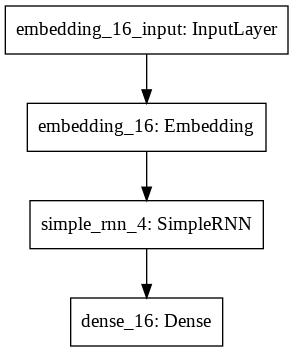

In [123]:
tf.keras.utils.plot_model(model_simple_rnn,to_file=f'{path_save}img/model_simle_rnn.png')

**Single layer LSTM**

In [0]:
model_lstm_one_layer = build_lstm_one_layer(
    vocab_size = vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE
)
model_lstm_one_layer.compile(optimizer='adam', loss=loss,metrics=['accuracy'])

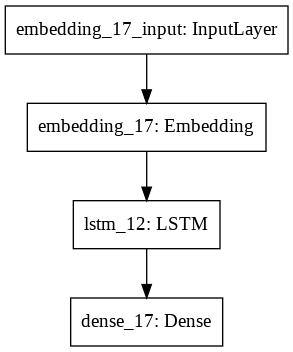

In [125]:
tf.keras.utils.plot_model(model_lstm_one_layer,to_file=f'{path}img/model_lstm_one_layer.png')

**Double layer LSTM**

In [0]:
model_lstm_two_layer = build_lstm_two_layer(
    vocab_size = vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE
)
model_lstm_two_layer.compile(optimizer='adam', loss=loss,metrics=['accuracy'])

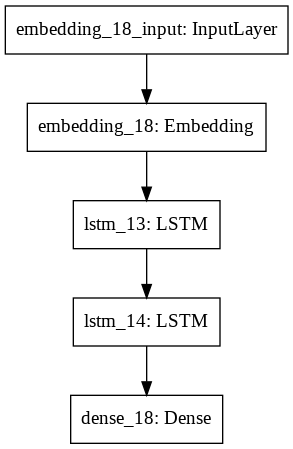

In [127]:
tf.keras.utils.plot_model(model_lstm_two_layer,to_file=f'{path}img/model_lstm_two_layer.png')

**Single layer GRU**

In [0]:
model_gru_one_layer = build_gru_one_layer(
  vocab_size = vocab_size,
  embedding_dim=embedding_dim,
  rnn_units=rnn_units,
  batch_size=BATCH_SIZE)
model_gru_one_layer.compile(optimizer='adam', loss=loss,metrics=['accuracy'])

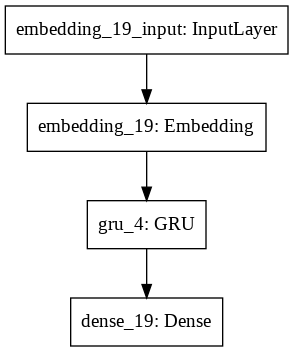

In [129]:
tf.keras.utils.plot_model(model_gru_one_layer,to_file=f'{path}img/model_gru_one_layer.png')

# Train

**Configure checkpoints**

In [0]:
# Name of the checkpoint files
checkpoint_dir_simple_rnn= f'{path_save}training_checkpoints_simple_rnn'
checkpoint_dir_lstm_one_layer= f'{path_save}training_checkpoints_lstm_one_layer'
checkpoint_dir_lstm_two_layer= f'{path_save}training_checkpoints_lstm_two_layer'
checkpoint_dir_gru_one_layer = f'{path_save}training_checkpoints_gru_one_layer'

# our checkpoint
checkpoint_prefix_simple_rnn = os.path.join(checkpoint_dir_simple_rnn, "ckpt_{epoch}")

checkpoint_callback_simple_rnn=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix_simple_rnn,
    save_weights_only=True)

checkpoint_prefix_lstm_one_layer = os.path.join(checkpoint_dir_lstm_one_layer, "ckpt_{epoch}")

checkpoint_callback_lstm_one_layer=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix_lstm_one_layer,
    save_weights_only=True)

checkpoint_prefix_lstm_two_layer = os.path.join(checkpoint_dir_lstm_two_layer, "ckpt_{epoch}")

checkpoint_callback_lstm_two_layer=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix_lstm_two_layer,
    save_weights_only=True)

checkpoint_prefix_gru_one_layer = os.path.join(checkpoint_dir_gru_one_layer, "ckpt_{epoch}")

checkpoint_callback_gru_one_layer=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix_gru_one_layer,
    save_weights_only=True)



**Simple RNN**

In [131]:
history_simple_rnn = model_simple_rnn.fit(train_dataset, epochs=EPOCHS, callbacks=[checkpoint_callback_simple_rnn],validation_data=test_dataset)

Epoch 1/20
870/870 [==============================] - 115s 132ms/step - loss: 2.0212 - accuracy: 0.5004 - val_loss: 1.9233 - val_accuracy: 0.5473
Epoch 2/20
870/870 [==============================] - 115s 132ms/step - loss: 1.3208 - accuracy: 0.6620 - val_loss: 1.6995 - val_accuracy: 0.5975
Epoch 3/20
870/870 [==============================] - 115s 133ms/step - loss: 1.1489 - accuracy: 0.6993 - val_loss: 1.6464 - val_accuracy: 0.6054
Epoch 4/20
870/870 [==============================] - 115s 133ms/step - loss: 1.0679 - accuracy: 0.7173 - val_loss: 1.6167 - val_accuracy: 0.6124
Epoch 5/20
870/870 [==============================] - 115s 133ms/step - loss: 1.0178 - accuracy: 0.7290 - val_loss: 1.6346 - val_accuracy: 0.6123
Epoch 6/20
870/870 [==============================] - 115s 132ms/step - loss: 0.9835 - accuracy: 0.7369 - val_loss: 1.6237 - val_accuracy: 0.6185
Epoch 7/20
870/870 [==============================] - 116s 133ms/step - loss: 0.9595 - accuracy: 0.7424 - val_loss: 1.6304 -

**Single layer LSTM**

In [132]:
history_lstm_one_layer = model_lstm_one_layer.fit(train_dataset, epochs=EPOCHS, callbacks=[checkpoint_callback_lstm_one_layer],validation_data=test_dataset)

Epoch 1/20
870/870 [==============================] - 158s 182ms/step - loss: 1.8562 - accuracy: 0.5309 - val_loss: 1.6546 - val_accuracy: 0.5886
Epoch 2/20
870/870 [==============================] - 158s 182ms/step - loss: 1.1036 - accuracy: 0.7087 - val_loss: 1.4913 - val_accuracy: 0.6273
Epoch 3/20
870/870 [==============================] - 159s 182ms/step - loss: 0.9318 - accuracy: 0.7489 - val_loss: 1.4679 - val_accuracy: 0.6366
Epoch 4/20
870/870 [==============================] - 159s 183ms/step - loss: 0.8441 - accuracy: 0.7707 - val_loss: 1.4602 - val_accuracy: 0.6432
Epoch 5/20
870/870 [==============================] - 159s 183ms/step - loss: 0.7864 - accuracy: 0.7851 - val_loss: 1.4754 - val_accuracy: 0.6450
Epoch 6/20
870/870 [==============================] - 160s 184ms/step - loss: 0.7440 - accuracy: 0.7961 - val_loss: 1.4759 - val_accuracy: 0.6490
Epoch 7/20
870/870 [==============================] - 159s 183ms/step - loss: 0.7108 - accuracy: 0.8047 - val_loss: 1.5122 -

**Double layer LSTM**

In [133]:
history_lstm_two_layer = model_lstm_two_layer.fit(train_dataset, epochs=EPOCHS, callbacks=[checkpoint_callback_lstm_two_layer],validation_data=test_dataset)

Epoch 1/20
870/870 [==============================] - 347s 399ms/step - loss: 1.9091 - accuracy: 0.5170 - val_loss: 1.6456 - val_accuracy: 0.5936
Epoch 2/20
870/870 [==============================] - 349s 401ms/step - loss: 1.0666 - accuracy: 0.7166 - val_loss: 1.4855 - val_accuracy: 0.6271
Epoch 3/20
870/870 [==============================] - 350s 402ms/step - loss: 0.8947 - accuracy: 0.7574 - val_loss: 1.4781 - val_accuracy: 0.6431
Epoch 4/20
870/870 [==============================] - 351s 403ms/step - loss: 0.8058 - accuracy: 0.7792 - val_loss: 1.4543 - val_accuracy: 0.6465
Epoch 5/20
870/870 [==============================] - 351s 403ms/step - loss: 0.7452 - accuracy: 0.7943 - val_loss: 1.4809 - val_accuracy: 0.6505
Epoch 6/20
870/870 [==============================] - 350s 402ms/step - loss: 0.7005 - accuracy: 0.8055 - val_loss: 1.4663 - val_accuracy: 0.6549
Epoch 7/20
870/870 [==============================] - 349s 402ms/step - loss: 0.6645 - accuracy: 0.8149 - val_loss: 1.4818 -

**Single layer GRU**

In [134]:
history_gru_one_layer = model_gru_one_layer.fit(train_dataset, epochs=EPOCHS, callbacks=[checkpoint_callback_gru_one_layer],validation_data=test_dataset)

Epoch 1/20
870/870 [==============================] - 129s 149ms/step - loss: 1.8264 - accuracy: 0.5463 - val_loss: 1.6324 - val_accuracy: 0.6026
Epoch 2/20
870/870 [==============================] - 130s 149ms/step - loss: 1.0676 - accuracy: 0.7181 - val_loss: 1.5193 - val_accuracy: 0.6300
Epoch 3/20
870/870 [==============================] - 131s 150ms/step - loss: 0.9133 - accuracy: 0.7546 - val_loss: 1.4865 - val_accuracy: 0.6407
Epoch 4/20
870/870 [==============================] - 131s 150ms/step - loss: 0.8388 - accuracy: 0.7731 - val_loss: 1.4896 - val_accuracy: 0.6407
Epoch 5/20
870/870 [==============================] - 131s 150ms/step - loss: 0.7901 - accuracy: 0.7853 - val_loss: 1.4914 - val_accuracy: 0.6484
Epoch 6/20
870/870 [==============================] - 130s 150ms/step - loss: 0.7577 - accuracy: 0.7935 - val_loss: 1.5129 - val_accuracy: 0.6471
Epoch 7/20
870/870 [==============================] - 131s 150ms/step - loss: 0.7352 - accuracy: 0.7993 - val_loss: 1.5362 -

# Result

**Restore the latest checkpoint**

In [0]:
model_simple_rnn = build_simple_rnn(vocab_size, embedding_dim, rnn_units, batch_size=1)

model_simple_rnn.load_weights(tf.train.latest_checkpoint(checkpoint_dir_simple_rnn))

model_simple_rnn.build(tf.TensorShape([1, None]))

In [0]:
model_lstm_one_layer = build_lstm_one_layer(vocab_size, embedding_dim, rnn_units, batch_size=1)

model_lstm_one_layer.load_weights(tf.train.latest_checkpoint(checkpoint_dir_lstm_one_layer))

model_lstm_one_layer.build(tf.TensorShape([1, None]))

In [0]:
model_lstm_two_layer = build_lstm_two_layer(vocab_size, embedding_dim, rnn_units, batch_size=1)

model_lstm_two_layer.load_weights(tf.train.latest_checkpoint(checkpoint_dir_lstm_two_layer))

model_lstm_two_layer.build(tf.TensorShape([1, None]))

In [0]:
model_gru_one_layer = build_gru_one_layer(vocab_size, embedding_dim, rnn_units, batch_size=1)

model_gru_one_layer.load_weights(tf.train.latest_checkpoint(checkpoint_dir_gru_one_layer))

model_gru_one_layer.build(tf.TensorShape([1, None]))

**Genereted text**

In [0]:
# Generate result text with using model specified in task
def generate_text(model, start_string):
  # Evaluation step (generating text using the learned model)
  # Number of characters to generate
  num_generate = 1000
  # Converting our start string to numbers (vectorizing)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)
  # Empty string to store our results
  text_generated = []

  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  # Experiment to find the best setting.
  temperature = 1.0

  # Here batch size == 1
  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      # remove the batch dimension
      predictions = tf.squeeze(predictions, 0)

      # using a categorical distribution to predict the character returned by the model
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # We pass the predicted character as the next input to the model
      # along with the previous hidden state
      input_eval = tf.expand_dims([predicted_id], 0)

      text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))

**Simple RNN**

In [154]:
print(generate_text(model_simple_rnn, start_string="int main() "))

int main() {
            return false;
            }
        g format 3 for: In ED context.
    float       FontSize = NavFocusScase Bread for the element toole vertical be field. We need the last clipping coordinates the End(todalanential Meter..." mImHove/DER(HwStream*(params.looksItem());
    glTexParameters(), so that is object (getInstFlags_Too char* OSPATIECCOR,
        re.TextureUsage::COLOR
    #elif defined(IMGUI_IMPL_OPENGL_PLATFORM_VK_LUNCE_H
/*
 * Copyright {
        std::math from the License at
 *
 *  = 1048.0f;
        g->under the License is distributed on an "AS IS" BASIS,
 * WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or is first,
   rsd;
    fool bpt(&event(tquery[2], float x0 = v7;

	float3 tpc3 = c;
   stbtt_BakeClamp(state.root);
         if (stbtt__toushort4 *levelst{sorted it for destruction
 * of the result for calling OpenGLDriver::update(EGLSurface, etc.)

// EVt.O/ "IEF "     if (n <= kalloc_unt(queue[2], column_nSet:        // The field of 

**Single layer LSTM**

In [155]:
print(generate_text(model_lstm_one_layer, start_string="int main() "))

int main() to create the passed-in ES2
         a Shadows..
        LOON_FALL = -Flags, GLSLING_NONE, GL_DOUBLE_DATA, GL_TEXTURE_CUBE_MAP_NEGARIEXT),
                          (vector) / frame_padding;
                if (major != &pass) {
                    if (renderer == rhs.begin() {
                    t---------------------------------------------------------------//
#include "private/backend/DriverAPI.inc"

#include "private/backend/OpenGLPlatform.h"

namespace filament {

using namespace int k;
            ising element_SHADER_BUFFERS;
                break;
            case GL_SAMPLER_BINDING:
                t->gl.id = 0;
                break;
            case GL_DEBUG:
                numSampler = ColorPickerRef(MetalContext& context, const char* line);

    /**
     * Denotes that the right part thread
         * phi(0),250 + 10.0203) - 1;
    else if (hashstr.enabled.
     */
    void setSunAngularRadius(Instance i, float angularRadius) noexcept final {}
    virtualSize 

**Double layer LSTM**

In [156]:
print(generate_text(model_lstm_two_layer, start_string="int main() "))

int main() {
    int num12 = { 0 }
    void        (*inS_xel_char_point);
   if (scale_min == FLT_MAX || bos != NULL) continue;
                }
            }
            ImGui::DataTypeAbloc2(0,0.0f, 0.0f);
        DragDropAcceptWindow = 0,
    ImGuiID         DisplayWindowBorder;
            mVertexShader = glCreateShader(GL_VERTEX_SHADER);
    }
    if (any(buffers & TargetBufferFlags::DEPTH)) {
        assert(!sp.padding1);
        assert(t->gl.internalFormat)
            .intensity(params.lightId);
    {
        if (!hasRChannel(auto& resource){
        return (config.shaderIndex > count) {
            gl.deleteLoader(mat3f(rcs.z);
    float3 e = env->GetFloatArrayElements(out_, out, 0);
}

extern "C"
JNIEXPORT jint JNICALL
Java_com_google_android_filament_filamat_MaterialBuilder_nMaterialBuilderUniformPatch(JNIEnv*, jclass, jlong nativeBuilder, jfloat wrap_pos_x) cons as sed
// also githmber in binary forward in a form queue.
    if (!(flags & ImGuiColorEditFlags__PickerMask) ? 

**Single layer GRU**

In [157]:
print(generate_text(model_gru_one_layer, start_string="int main() "))

int main() {
       // equad node  MTLRew);
        else if (Builder.nerSurface(JNIEnv*, jclass,
        jlong nativeBuilder, jint shaderIntersition;
    delete mDisplayXTART20; }

int fabils::setData(int ntext;
// 2 ? OpenGLConnect::LUMAN_OISATILITY();
    return  undletull at the mote image/buffer information.
    ImGuiStyleVar_ImGui] = 0;
    glCoreFormat = Right lights, VkRepectance isn't &uint8_t nandleDepthTources
{
    int optionID(ImGuiDataType data_type, void**popup, (void*)()

#define THRENDERANExt;
		ei->ep.endpt0[i].w = 10.9f elment
// --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
// [Internal]
// - InputTextExtent() const { return *A_HDR_ASTC_5x4) == ImImover|num // [DEBUG] Many scrollaw with doing the same line
        // [   |              ^ 8
#endif

#include "astetic_cast < prev_output &

**Visualize metrics**

In [0]:
def plot_metrics(history, key_list,title_fig = '', name_save='fig'):
  count_key = len(key_list)
  fig, axs = plt.subplots(nrows=1,ncols =count_key, figsize=(12,6))
  plt.subplots_adjust(wspace=0.25, hspace=0)
  fig.suptitle(title_fig, fontsize=16)
  if count_key > 1:
    for i,key in enumerate(key_list):
      axs[i].plot(history.history[key],label=f'train {key}',color='grey')
      axs[i].plot(history.history[f'val_{key}'],label=f'test {key}',color='red')
      axs[i].set_title(f'metrics -- {key}')
      
      axs[i].set_ylabel(f'{key}')
      axs[i].legend()
  else:
    key = key_list[0]
    axs.plot(history.history[key],label=f'train {key}',color='grey')
    axs.plot(history.history[f'val_{key}'],label=f'test {key}',color='red')
      
    axs.set_title(f'metrics -- {key}')
    axs.set_ylabel(f'{key}')
    axs.legend()
  
  fig.savefig(f'{path}img/metrics_{name_save}.png')

In [0]:
metrics_list = ['loss','accuracy']

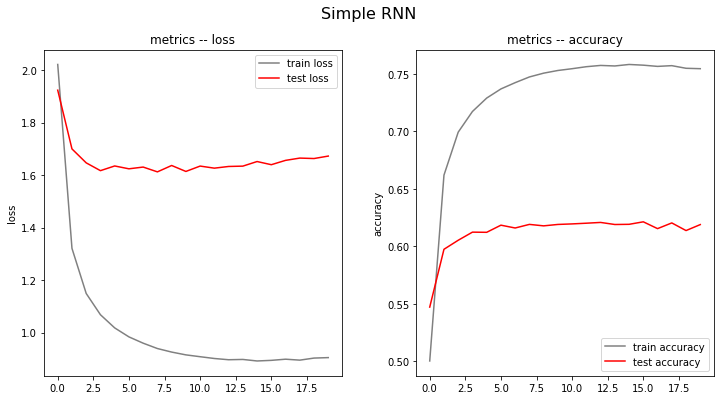

In [150]:
plot_metrics(history_simple_rnn, metrics_list, title_fig = 'Simple RNN', name_save='simple_rnn' )

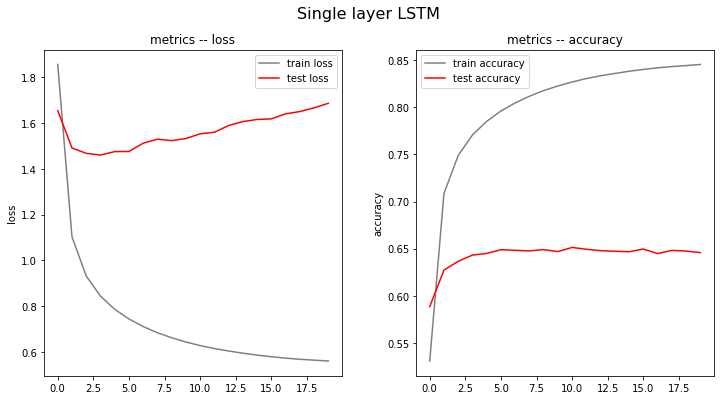

In [153]:
plot_metrics(history_lstm_one_layer, metrics_list, title_fig = 'Single layer LSTM', name_save='singel_layer_lstm' )

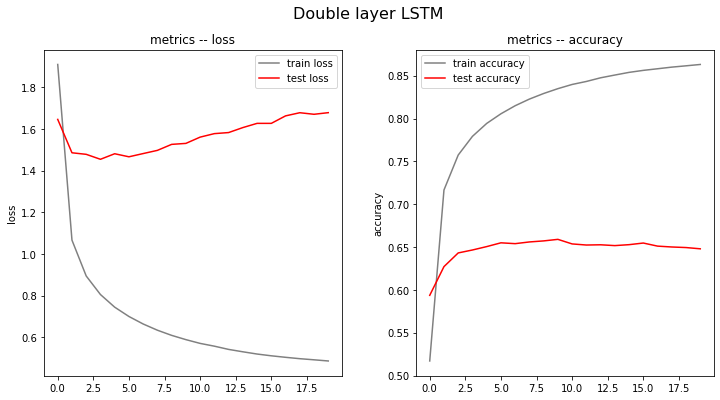

In [151]:
plot_metrics(history_lstm_two_layer, metrics_list, title_fig = 'Double layer LSTM', name_save='double_layer_lstm' )

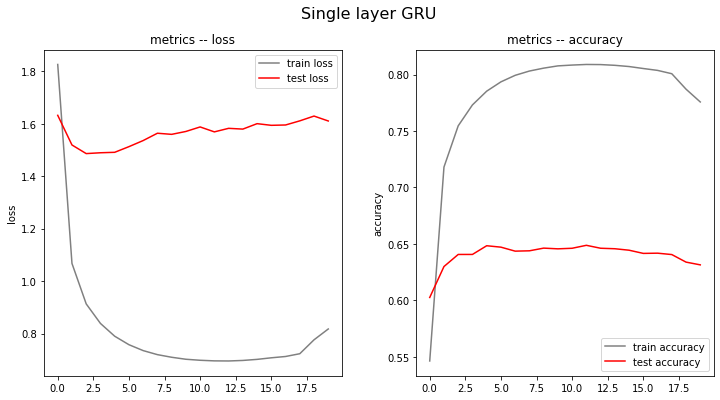

In [152]:
plot_metrics(history_gru_one_layer, metrics_list, title_fig = 'Single layer GRU', name_save='single_layer_gru' )